# Assignment 1

Consider two Gaussian distributions whose parameters are given as follows:
\begin{equation}
\begin{split}
\mu_1 = \begin{bmatrix} 3 \\ 1 \end{bmatrix}, & \quad \Sigma_1 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}, \\
\mu_2 = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, & \quad \Sigma_2 = \begin{bmatrix} 1 & 2 \\ 2 & 5 \end{bmatrix}.
\end{split}
\end{equation}


## (1) Plot

Show the scatter plot of bi-variate random numbers (2-d samples) $X$ generated from the above two distributions (use different colors or markers so that the two distributions can be distinguished).

* You can use [`numpy.random.multivariate_normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html?highlight=multivariate#numpy.random.multivariate_normal) to generate random samples.

In [316]:
import numpy as np
import matplotlib.pyplot as plt

# Define Parameters
mu1 = [3, 1]
sigma1 = [[1, 2], [2, 5]]

mu2 = [1, 3]
sigma2 = [[1, 2], [2, 5]]

In [352]:
# Calculate random variables
from numpy.random import default_rng
rng = default_rng()

n = 1000
x1 = rng.multivariate_normal(mu1, sigma1, n)
x2 = rng.multivariate_normal(mu2, sigma2, n)

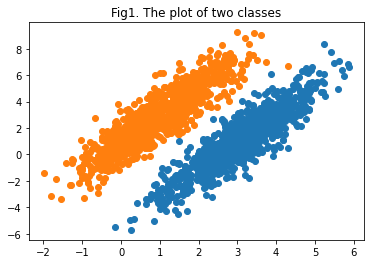

In [396]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x1[:, 0], x1[:, 1])
ax.scatter(x2[:, 0], x2[:, 1])
ax.set_title("Fig1. The plot of two classes")

plt.show()

## (2) PCA

Apply PCA to the 2-d samples generated in (1) by assuming two distributions as a single sample set. Draw the 1st principal axis on the scatter plot in (1). (Do not use built-in / library function of PCA, such as `sklearn.decomposition.PCA`)


In [354]:
import numpy.linalg as LA

# Calculate covariance matrix
def calc_cov(x):
    x_bar = np.mean(x, axis=0)
    return (x - x_bar).T @ (x - x_bar) / (x.shape[0])

x = np.concatenate([x1, x2])
cov = calc_cov(x)

# Calculate principal axis
w, v = LA.eig(cov)

if w[0] < w[1]:
    p_axis = v[:, 1]
else:
    p_axis = v[:, 0]

slope = p_axis[1] / p_axis[0]

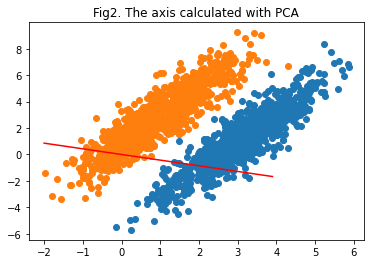

In [397]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(-2, 4, 0.1)

ax.scatter(x1[:, 0], x1[:, 1])
ax.scatter(x2[:, 0], x2[:, 1])
ax.plot(x_axis, x_axis * slope, color="red")
ax.set_title("Fig2. The axis calculated with PCA")

plt.show()

## (3) LDA

Apply Fisher LDA to the 2-d samples generated in (1) by assuming the two distributions are two different classes. Draw the calculated axis on the scatter plot. (Do not use built-in function of LDA, such as `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`)

In [356]:
# Calculate x1_bar, x2_bar
x1_bar = np.mean(x1, axis=0)
x2_bar = np.mean(x2, axis=0)

# Calculate s_w and a
s_w = (x1 - x1_bar).T @ (x1 - x1_bar) + (x2 - x2_bar).T @ (x2 - x2_bar)
a = LA.inv(s_w) @ (x2_bar - x1_bar)

slope = a[1] / a[0]

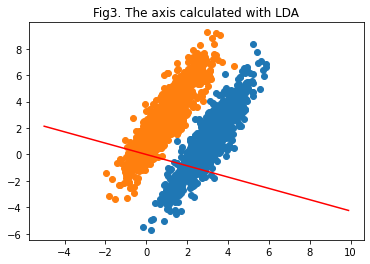

In [398]:
# Plot
fig = plt.figure()
ax = fig.add_subplot(111)

x_axis = np.arange(-5, 10, 0.1)

ax.scatter(x1[:, 0], x1[:, 1])
ax.scatter(x2[:, 0], x2[:, 1])
ax.plot(x_axis, x_axis * slope, color="red")
ax.set_title("Fig3. The axis calculated with LDA")

plt.show()

## (4) Histograms

Show the 1-d histograms of the sample data transformed by the calculated axes in (2) and (3).
* You can use [`numpy.histogram()`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html) and/or [`matplotlib.pyplot.hist()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist).

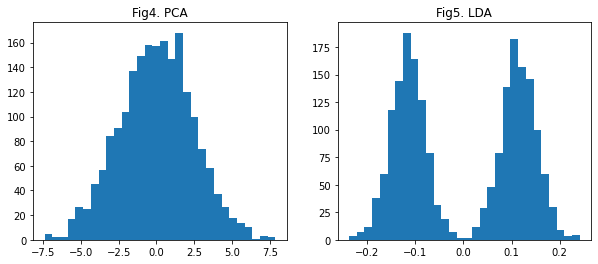

In [399]:
# Plot
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# PCA
ax1.hist(p_axis @ (x - m).T / np.sqrt(LA.norm(p_axis, 2)), bins=30)
ax1.set_title("Fig4. PCA")

# LDA
ax2.hist(a @ (x - m).T / np.sqrt(LA.norm(a, 2)), bins=30)
ax2.set_title("Fig5. LDA")

plt.show()

# Discussions

## The axis in PCA
The axis calculated by PCA above is the one with the largest variance when projecting the data.
However, this axis does not take into account the fact that the data consist of two classes,
which makes classification after projection to this axis difficult.

## The axis in LDA
The axis calculated by LDA is designed to increase the variance between classes while decreasing
the variance within each class.
LDA can take into account the two classes, which makes classification after projection to this axis
easy.
This is obvious in Fig5.